>## Diabetes Prediction Using Artificial Neural Networks (ANN)
### Purpose of the project:
    To build a robust and interpretable ANN model that predicts the likelihood of output based on training of the key attributes.
### Aim of this Project:
    The aim of this project is to develop a reliable Artificial Neural Network (ANN) model using the Diabetes dataset to predict the likelihood of diabetes based on key medical indicators. 


In [2]:
## importing basics dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## importing datasets
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
## replacing 0 with 'nan'(0 -> not ideal value here)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = data[['Glucose', 'BloodPressure', 
'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [8]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
## filling nan with induviduals olumns mean
data.fillna(data.mean(),inplace=True)

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

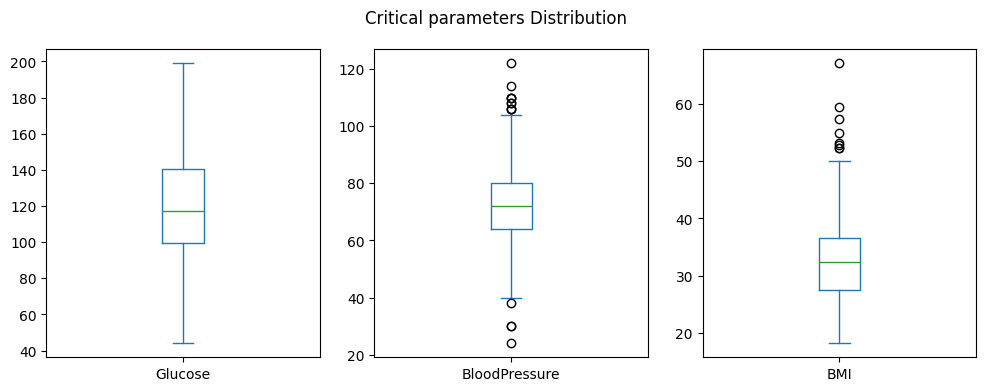

In [12]:
## outliers checking of critical parameters
data[['Glucose', 'BloodPressure', 'BMI']].plot(kind='box', subplots=True,figsize=(12, 4))
plt.suptitle('Critical parameters Distribution')
plt.show()

In [13]:
## splitting data into test & train
X = data.iloc[:,0:8] ## train set
y = data.iloc[:,8]  ## test set

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [15]:
X.shape

(768, 8)

In [16]:
## splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=18)

In [17]:
## scaling the data into 0 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.53699298, -0.6953151 , -0.67861962, ..., -0.42120241,
        -0.28092753, -1.04347959],
       [ 0.34756294, -0.24486098,  0.13453648, ..., -1.11838975,
         0.89328408,  2.01157833],
       [-1.12669692,  0.49517078,  0.94769258, ..., -0.76979608,
        -0.70876527,  2.18130377],
       ...,
       [-1.12669692,  1.29955313,  0.2971677 , ...,  2.99211059,
         0.94012762, -0.70402871],
       [-0.53699298, -0.6953151 , -0.19072596, ...,  1.1474691 ,
         0.68404956, -0.70402871],
       [ 3.00123069, -0.6953151 ,  0.45979892, ...,  0.58100438,
        -0.14351979,  1.07808841]], shape=(537, 8))

Building Model

In [19]:
## importing dependencies
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [20]:
## Designing model architecture
model = Sequential()
# input layer
model.add(Dense(units=8,activation='relu'))
# 1st hidden layer
model.add(Dense(units=5,activation='relu'))
# 2nd hidden layer
model.add(Dense(units=3,activation='relu'))
# O/P layer
model.add(Dense(units=1,activation='sigmoid'))

In [21]:
## model setup
"""
we will use here few methods to opimize, track and to validate our model during training
--> 'adam' optimizer for adjusting the weights in back propagation
--> 'binary_crossentropy' for calculating the difference of Actual vs Predicted O/P and 
--> 'accuracy' metrics to track the model accuracy
"""
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
## earlystopping  --> helpful if model stopped improving yet running due to epoch
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [23]:
## fitting the the Model
final_model = model.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=20,callbacks=stop)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4827 - loss: 0.7219 - val_accuracy: 0.5617 - val_loss: 0.6660
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6640 - loss: 0.6439 - val_accuracy: 0.6296 - val_loss: 0.5992
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6827 - loss: 0.5952 - val_accuracy: 0.6358 - val_loss: 0.5652
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6907 - loss: 0.5666 - val_accuracy: 0.6296 - val_loss: 0.5452
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6827 - loss: 0.5477 - val_accuracy: 0.6420 - val_loss: 0.5266
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6907 - loss: 0.5302 - val_accuracy: 0.6728 - val_loss: 0.5146
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7227 - loss: 0.5155 - val_accuracy: 0.6852 - val_loss: 0.5039
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7360 - loss: 0.5040 - val_accuracy: 0.7037 - val_loss

In [24]:
## model prediction
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


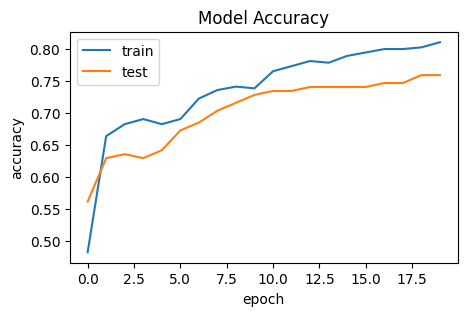

In [25]:
## summary of accuracy history
plt.figure(figsize=(5,3))
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [26]:
# model validation
from sklearn.metrics import accuracy_score
accs = accuracy_score(y_pred,y_test)
accs

0.7359307359307359